In [71]:
######importing neccesary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt








In [72]:
#importing data

df = pd.read_csv(r"C:\Users\user\Downloads\loan\train_u6lujuX_CVtuZ9i (1).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [74]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
##handling missing values

# Fill missing values in categorical columns with the mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fill missing values in numerical columns with the median
numerical_columns = ['LoanAmount', 'Loan_Amount_Term']
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Confirm there are no more missing values
missing_values_after = df.isnull().sum()





In [76]:
#let's recheck for null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [77]:
# 1. Save the cleaned dataset
df.to_csv(r"C:\Users\user\Downloads\loan\cleaned_loan_data.csv", index=False)


#  Save the grouped analysis by loan status
df.to_csv(r"C:\Users\user\Downloads\loan\loan_status_group.csv")

#Save the analysis based on credit history and property area
df.to_csv(r"C:\Users\user\Downloads\loan\credit_property_group.csv")



#LOAN STATUS BY EDUCATION LEVEL


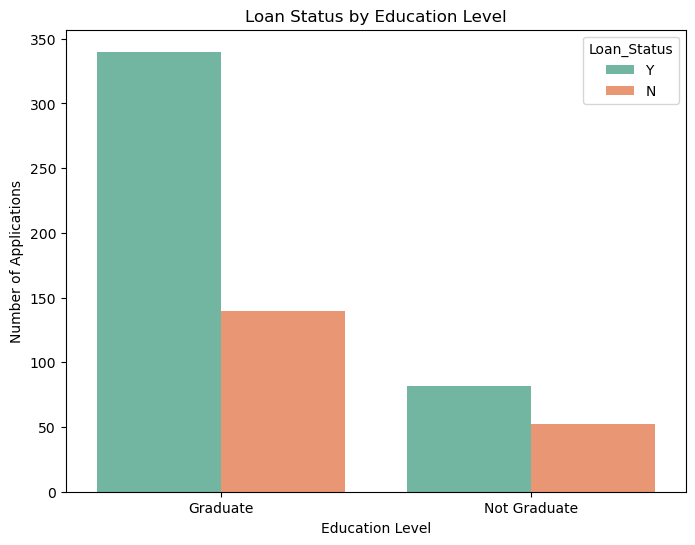

In [78]:
# Plotting Loan Status by Education Level
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='Set2')
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Applications')
plt.savefig(r"C:\Users\user\Downloads\loan\distribution_of_loan_status.png")
plt.show()

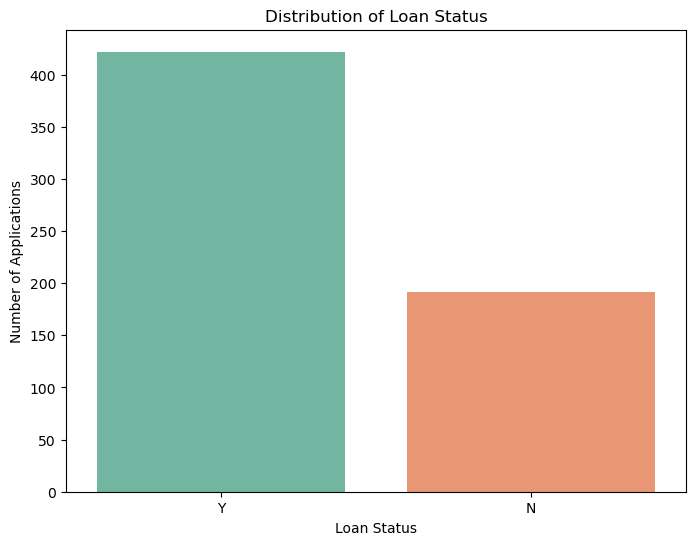

In [79]:

# Distribution of Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df, palette='Set2')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applications')
plt.show()

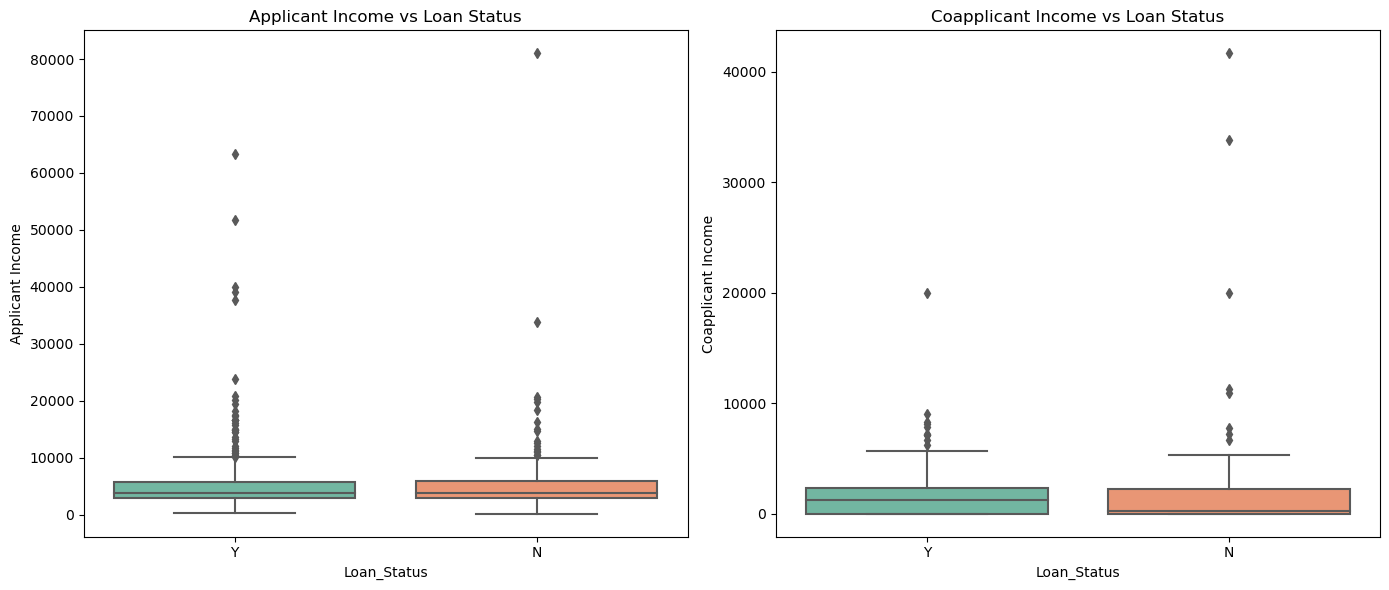

In [80]:
# Income distribution based on Loan Status
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='Set2')
plt.title('Applicant Income vs Loan Status')
plt.ylabel('Applicant Income')

plt.subplot(1, 2, 2)
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df, palette='Set2')
plt.title('Coapplicant Income vs Loan Status')
plt.ylabel('Coapplicant Income')

plt.tight_layout()
plt.savefig(r"C:\Users\user\Downloads\loan\income_vs_loan_status.png")
plt.show()


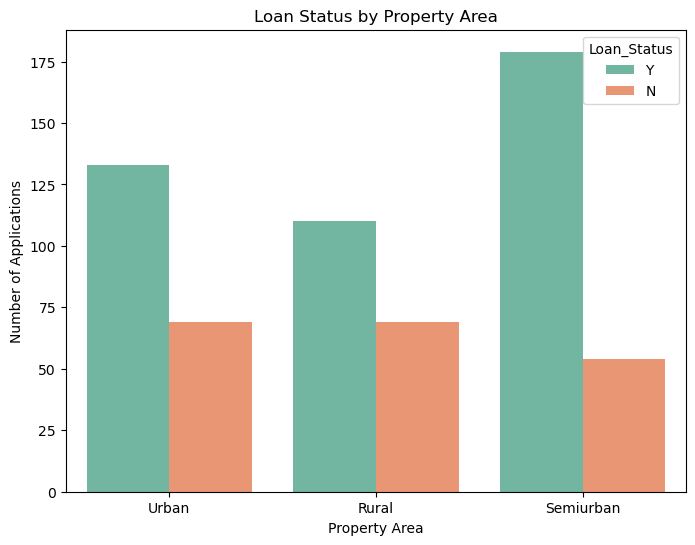

In [81]:
# Loan Status by Property Area
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette='Set2')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Number of Applications')
plt.show()


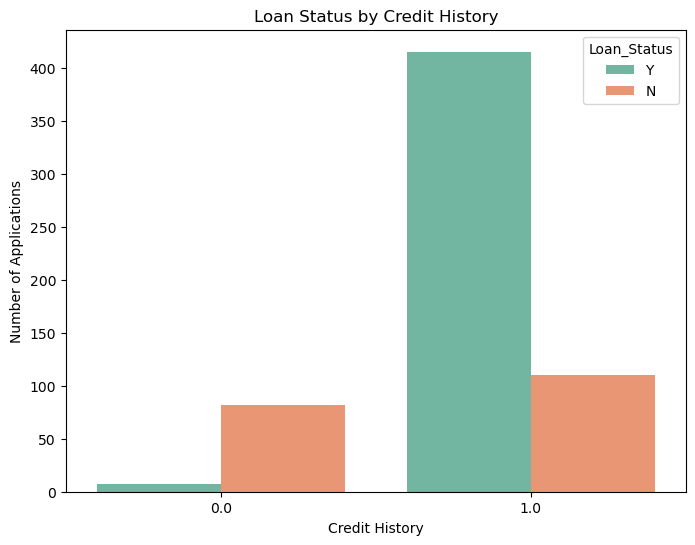

In [82]:
# Loan Status by Credit History
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='Set2')
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Number of Applications')
plt.savefig(r"C:\Users\user\Downloads\loan\loan_status_by_credit_history.png")
plt.show()


#Exploring Relationships Between Variables

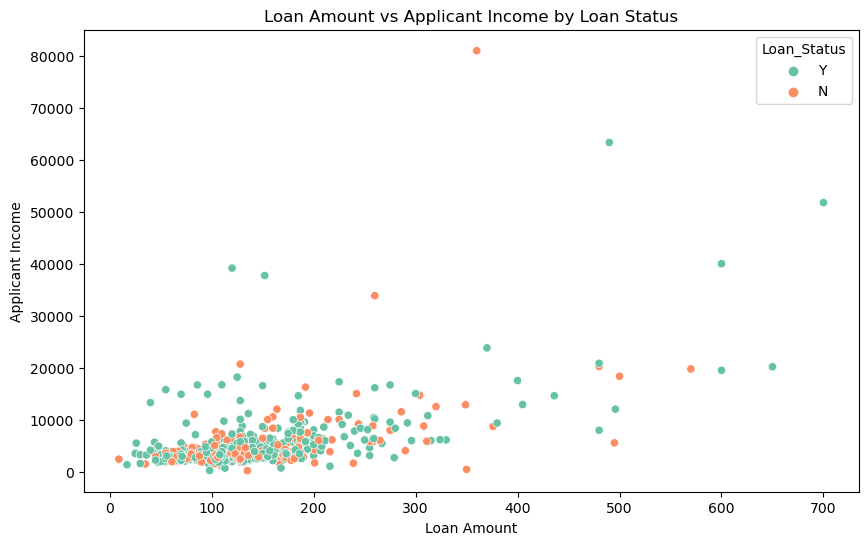

In [83]:
# Relationship between Loan Amount, Applicant Income, and Loan Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', data=df, palette='Set2')
plt.title('Loan Amount vs Applicant Income by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Applicant Income')
plt.savefig(r"C:\Users\user\Downloads\loan\loan_amount_vs_income.png")
plt.show()


#Analyzing Statistical Metric

In [84]:
# Grouping by Loan Status to get mean values
loan_status_group = df.groupby('Loan_Status').mean(numeric_only=True)
print(loan_status_group)


# Analyzing the average loan amount based on credit history and property area
credit_property_group = df.groupby(['Credit_History', 'Property_Area'])['LoanAmount'].mean().reset_index()
print(credit_property_group)


             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                5446.078125        1877.807292  149.890625         344.56250   
Y                5384.068720        1504.516398  143.869668         341.43128   

             Credit_History  
Loan_Status                  
N                  0.572917  
Y                  0.983412  
   Credit_History Property_Area  LoanAmount
0             0.0         Rural  146.428571
1             0.0     Semiurban  158.833333
2             0.0         Urban  132.838710
3             1.0         Rural  152.377483
4             1.0     Semiurban  143.103448
5             1.0         Urban  142.982456
